In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime, timedelta

In [5]:
berlin_df = pd.read_csv('berlin-houses.csv')
berlin_df.head()

,id,lat,lon,cold_price,currency,short_listed,postcode_id,balcony,builtin_kitchen,created_date,...,published_date,warm_price,address,link,quarter,garden,listing_type,localhost_date,no_longer_available,no_longer_available_date
0,108076043,52.54692,13.39993,954.83,EUR,False,13355,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,2019-04-13 21:28:29.524733,True,2019-06-19 20:59:47.343696
1,109645532,52.46982,13.43096,425.98,EUR,False,12051,True,False,2019-01-30 13:48:26.000000,...,2019-01-30 13:48:26.000000,630.98,"Schierker Straße 31, Neukölln (Neukölln), Berlin",https://www.immobilienscout24.de/expose/109645532,Neukölln (Neukölln),False,S,2019-04-13 21:28:30.204815,True,2019-06-21 06:36:13.552834
2,108077960,52.54727,13.39899,769.99,EUR,False,13355,True,True,2018-10-30 12:28:47.000000,...,2018-10-30 12:28:47.000000,952.47,"Lichtburgring 4, Wedding (Wedding), Berlin",https://www.immobilienscout24.de/expose/108077960,Wedding (Wedding),False,M,2019-04-13 21:28:29.522283,True,2019-06-19 20:59:47.345571
3,109503935,52.51210,13.46197,949.00,EUR,False,10245,False,False,2019-01-23 11:32:09.000000,...,2019-01-23 11:32:09.000000,1139.00,"Boxhagener Str. 98, Friedrichshain (Friedrichs...",https://www.immobilienscout24.de/expose/109503935,Friedrichshain (Friedrichshain),False,M,2019-04-13 21:28:29.538720,True,2019-06-19 20:59:47.352013
4,110143024,52.50508,13.38592,559.96,EUR,False,10963,True,False,2019-02-27 08:55:20.000000,...,2019-02-27 08:55:20.000000,735.51,"Anhalterstraße 11, Kreuzberg (Kreuzberg), Berlin",https://www.immobilienscout24.de/expose/110143024,Kreuzberg (Kreuzberg),False,S,2019-04-13 21:28:30.185993,True,2019-06-19 20:59:47.359163


In [5]:
berlin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1038 non-null   int64  
 1   lat                       1038 non-null   float64
 2   lon                       1038 non-null   float64
 3   cold_price                1038 non-null   float64
 4   currency                  1038 non-null   object 
 5   short_listed              1038 non-null   bool   
 6   postcode_id               1038 non-null   int64  
 7   balcony                   1038 non-null   bool   
 8   builtin_kitchen           1038 non-null   bool   
 9   created_date              1001 non-null   object 
 10  energy_certificate        1038 non-null   bool   
 11  has_new_flag              1038 non-null   bool   
 12  living_space              1018 non-null   float64
 13  new_home_builder          1038 non-null   bool   
 14  number_r

In [7]:
berlin_df.isnull().any()

id                          False
lat                         False
lon                         False
cold_price                  False
currency                    False
short_listed                False
postcode_id                 False
balcony                     False
builtin_kitchen             False
created_date                 True
energy_certificate          False
has_new_flag                False
living_space                 True
new_home_builder            False
number_rooms                 True
private_offer               False
modified_date                True
published_date               True
warm_price                   True
address                      True
link                         True
quarter                      True
garden                      False
listing_type                 True
localhost_date              False
no_longer_available         False
no_longer_available_date     True
dtype: bool

In [6]:
berlin_df.isnull().sum()

id                            0
lat                           0
lon                           0
cold_price                    0
currency                      0
short_listed                  0
postcode_id                   0
balcony                       0
builtin_kitchen               0
created_date                 37
energy_certificate            0
has_new_flag                  0
living_space                 20
new_home_builder              0
number_rooms                 20
private_offer                 0
modified_date                20
published_date               37
warm_price                   20
address                      20
link                         20
quarter                      20
garden                        0
listing_type                 20
localhost_date                0
no_longer_available           0
no_longer_available_date    106
dtype: int64

In [7]:
berlin_df.columns

Index(['id', 'lat', 'lon', 'cold_price', 'currency', 'short_listed',
       'postcode_id', 'balcony', 'builtin_kitchen', 'created_date',
       'energy_certificate', 'has_new_flag', 'living_space',
       'new_home_builder', 'number_rooms', 'private_offer', 'modified_date',
       'published_date', 'warm_price', 'address', 'link', 'quarter', 'garden',
       'listing_type', 'localhost_date', 'no_longer_available',
       'no_longer_available_date'],
      dtype='object')

In [9]:
berlin_df['number_rooms'].head(15)

0     NaN
1     2.0
2     2.0
3     2.0
4     2.0
5     4.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
Name: number_rooms, dtype: float64

In [10]:
berlin_df.dropna(inplace=True)

In [12]:
berlin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 1037
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        895 non-null    int64  
 1   lat                       895 non-null    float64
 2   lon                       895 non-null    float64
 3   cold_price                895 non-null    float64
 4   currency                  895 non-null    object 
 5   short_listed              895 non-null    bool   
 6   postcode_id               895 non-null    int64  
 7   balcony                   895 non-null    bool   
 8   builtin_kitchen           895 non-null    bool   
 9   created_date              895 non-null    object 
 10  energy_certificate        895 non-null    bool   
 11  has_new_flag              895 non-null    bool   
 12  living_space              895 non-null    float64
 13  new_home_builder          895 non-null    bool   
 14  number_ro

In [14]:
berlin_df.describe()

,id,lat,lon,cold_price,postcode_id,living_space,number_rooms,warm_price
count,8.950000e+02,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,1.093382e+08,52.509957,13.423642,774.725676,10832.621229,63.367777,2.220112,954.178380
std,9.617338e+06,0.020083,0.030066,195.245716,828.204098,18.880594,0.486551,221.125937
min,3.140399e+07,52.467010,13.342200,0.000000,10099.000000,40.000000,2.000000,100.000000
25%,1.110742e+08,52.498620,13.400490,650.035000,10245.000000,54.000000,2.000000,800.000000
50%,1.121737e+08,52.509640,13.424780,790.000000,10407.000000,60.000000,2.000000,965.330000
75%,1.124339e+08,52.524020,13.447610,939.455000,10969.000000,69.245000,2.000000,1115.705000
max,1.127370e+08,52.549230,13.494310,1100.000000,13357.000000,456.000000,5.000000,1621.520000


In [17]:
berlin_df['number_rooms'].value_counts()

2.0    725
3.0    145
4.0     23
5.0      2
Name: number_rooms, dtype: int64

In [19]:
berlin_df['quarter'].value_counts()

Friedrichshain (Friedrichshain)      244
Kreuzberg (Kreuzberg)                177
Neukölln (Neukölln)                  132
Mitte (Mitte)                        128
Prenzlauer Berg (Prenzlauer Berg)    119
Wedding (Wedding)                     28
Schöneberg (Schöneberg)               22
Lichtenberg (Lichtenberg)             16
Treptow (Treptow)                     14
Tiergarten (Tiergarten)               14
Plänterwald (Treptow)                  1
Name: quarter, dtype: int64

C:\Users\avanish\AppData\Local\Temp\ipykernel_15200\2743250281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(berlin_df.corr(), annot=True , fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})


<AxesSubplot: >

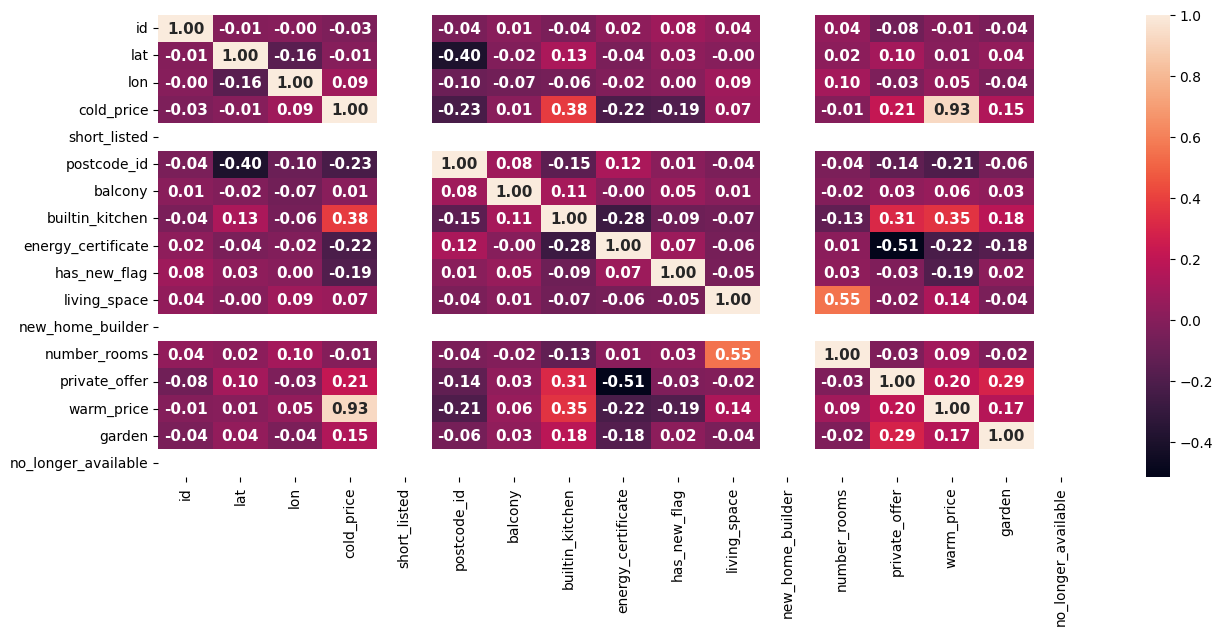

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(berlin_df.corr(), annot=True , fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})

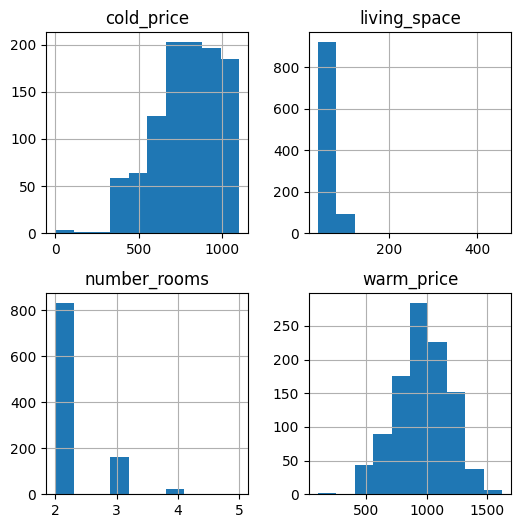

In [8]:
berlin_df[['cold_price', 'living_space', 'number_rooms', 'warm_price']].hist(figsize=(6, 6));

In [9]:
berlin_df.listing_type.value_counts()

S     758
M     228
L      27
XL      5
Name: listing_type, dtype: int64

In [10]:
berlin_df.balcony.value_counts()

True     632
False    406
Name: balcony, dtype: int64

In [11]:
berlin_df.builtin_kitchen.value_counts()

False    578
True     460
Name: builtin_kitchen, dtype: int64

In [12]:
berlin_df.garden.value_counts()

False    975
True      63
Name: garden, dtype: int64

In [28]:
berlin_df.living_space.value_counts()

60.00    24
55.00    20
70.00    18
50.00    15
62.00    15
         ..
59.04     1
85.26     1
56.33     1
90.22     1
52.39     1
Name: living_space, Length: 539, dtype: int64

<AxesSubplot: >

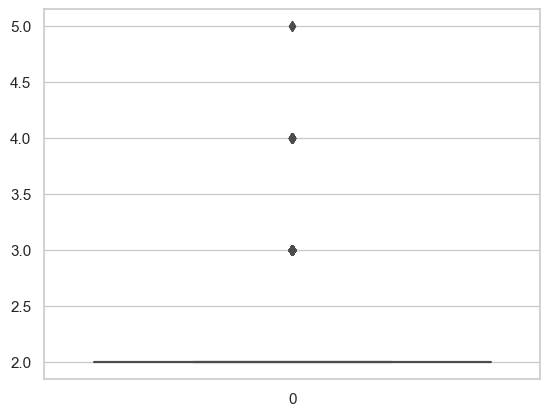

In [30]:
sns.set_style('whitegrid')
sns.boxplot(berlin_df.number_rooms)

In [31]:
berlin_df.number_rooms.describe()

count    1018.000000
mean        2.212181
std         0.477795
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: number_rooms, dtype: float64

<AxesSubplot: xlabel='builtin_kitchen', ylabel='living_space'>

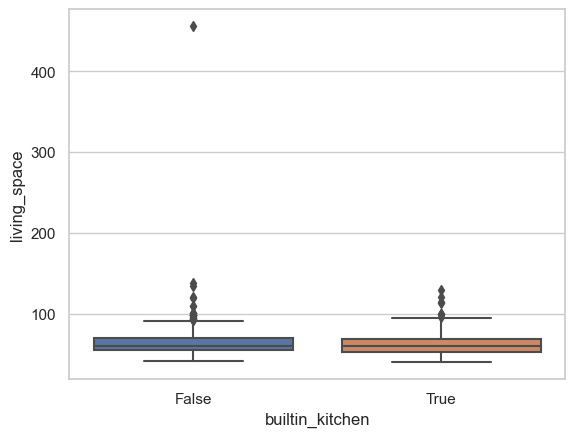

In [32]:
sns.boxplot(x= berlin_df.builtin_kitchen, y=berlin_df.living_space)

<AxesSubplot: xlabel='listing_type', ylabel='living_space'>

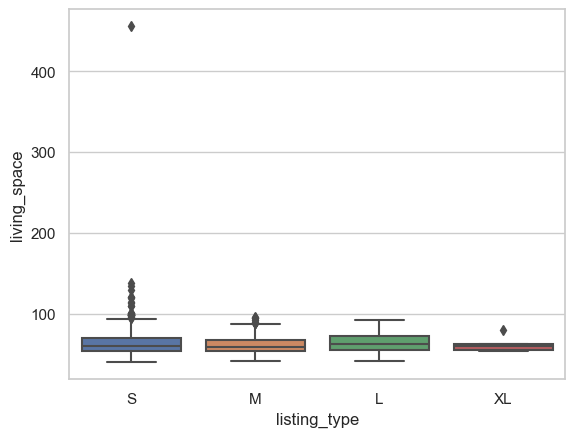

In [34]:
sns.boxplot(x= berlin_df.listing_type, y=berlin_df.living_space)

<AxesSubplot: xlabel='garden', ylabel='number_rooms'>

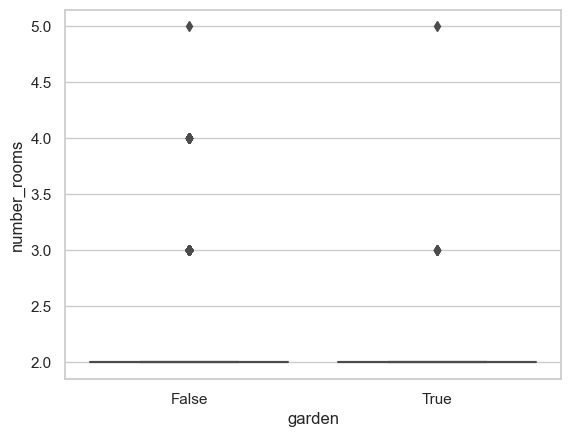

In [35]:
sns.boxplot(x = 'garden', y= 'number_rooms', data = berlin_df)

<AxesSubplot: xlabel='garden', ylabel='number_rooms'>

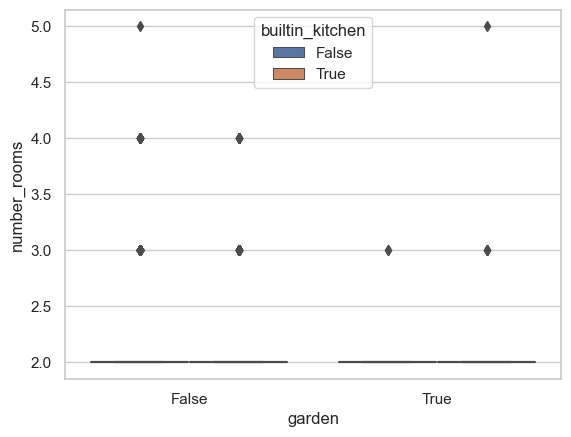

In [37]:
sns.boxplot(x = 'garden', y= 'number_rooms', hue='builtin_kitchen', data = berlin_df)

In [38]:
berlin_df['new_parameter'] = berlin_df.living_space > 50

<AxesSubplot: xlabel='balcony', ylabel='number_rooms'>

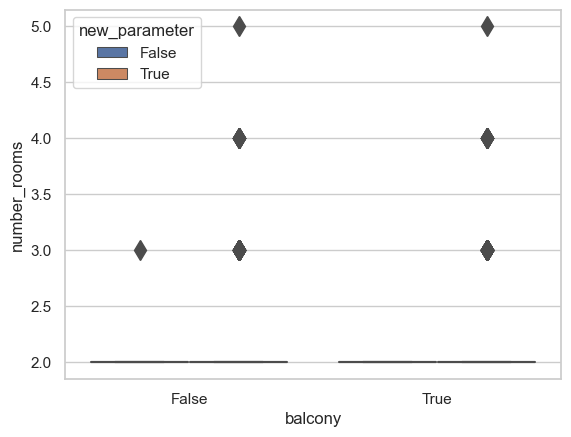

In [47]:
sns.boxplot(x='balcony', y='number_rooms' , hue='new_parameter' , data= berlin_df, fliersize=10)

In [48]:
berlin_df.created_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1038 entries, 0 to 1037
Series name: created_date
Non-Null Count  Dtype 
--------------  ----- 
1001 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB
